# 의사결정 트리

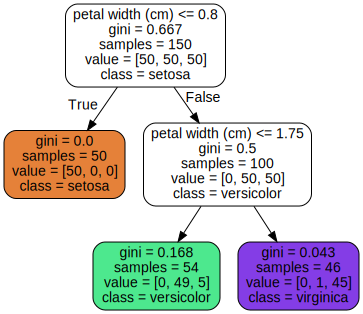

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import numpy as np
import pydot
import pydotplus
import os


iris = load_iris()
iris.keys()

X = iris.data[:,2:] #특징행열(데이터)과 대상 벡터(레이블) 만들기(전체 중 앞에서 2개)
y = iris.target #특징행열(데이터)과 대상 벡터(레이블) 만들기


np.unique(iris.target, return_counts = True)

tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

export_graphviz(tree, out_file="iris.dot",
                           feature_names=iris.feature_names[2:],#(전체 중 앞에서 2개)
                           class_names=iris.target_names, #분류
                           rounded=True, 
                           filled =True, #색상
                           impurity= True) #gini계수


import graphviz

with open("iris.dot") as f:
    dot_graph =f.read()
    
graphviz.Source(dot_graph)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import numpy as np
import pydot
import pydotplus
import os


iris = load_iris()
iris.keys()

X = iris.data[:,:-2] #특징행열(데이터)과 대상 벡터(레이블) 만들기(전체 중 뒤에서 2개)
y = iris.target #특징행열(데이터)과 대상 벡터(레이블) 만들기


np.unique(iris.target, return_counts = True)

tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

export_graphviz(tree, out_file="iris.dot",
                           feature_names=iris.feature_names[:-2],#(전체 중 뒤에서 2개)
                           class_names=iris.target_names, #분류
                           rounded=True, 
                           filled =True, #색상
                           impurity= True) #gini계수


import graphviz

with open("iris.dot") as f:
    dot_graph =f.read()
    
graphviz.Source(dot_graph)

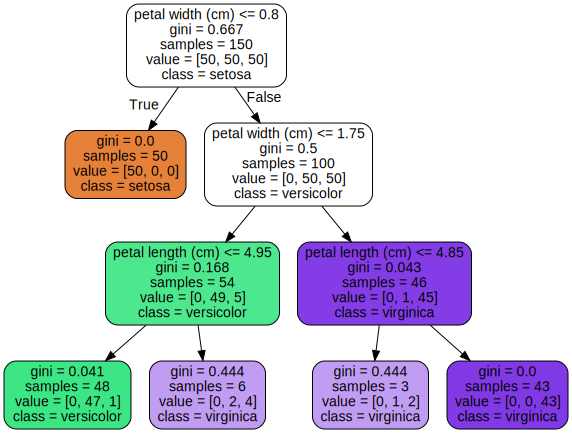

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import numpy as np
import pydot
import pydotplus
import os


iris = load_iris()
iris.keys()

X = iris.data[:,2:] #특징행열(데이터)과 대상 벡터(레이블) 만들기
y = iris.target


np.unique(iris.target, return_counts = True)

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)

export_graphviz(tree, out_file="iris.dot",
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names, #분류
                           rounded=True, 
                           filled =True, #색상
                           impurity= True) #gini계수

import graphviz

with open("iris.dot") as f:
    dot_graph =f.read()
    
graphviz.Source(dot_graph)

### 전체 데이터

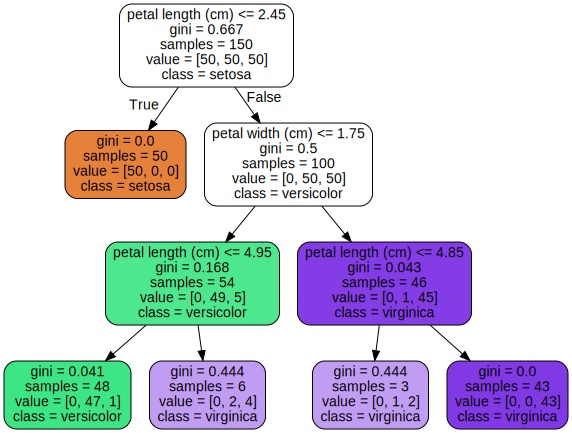

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import numpy as np
import pydot
import pydotplus
import os


iris = load_iris()
iris.keys()

X = iris.data #특징행열(데이터)과 대상 벡터(레이블) 만들기
y = iris.target #특징행열(데이터)과 대상 벡터(레이블) 만들기


np.unique(iris.target, return_counts = True)

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)

export_graphviz(tree, out_file="iris.dot",
                           feature_names=iris.feature_names,
                           class_names=iris.target_names, #분류
                           rounded=True, 
                           filled =True, #색상
                           impurity= True) #gini계수

import graphviz

with open("iris.dot") as f:
    dot_graph =f.read()
    
graphviz.Source(dot_graph)

### train_test_split 트리

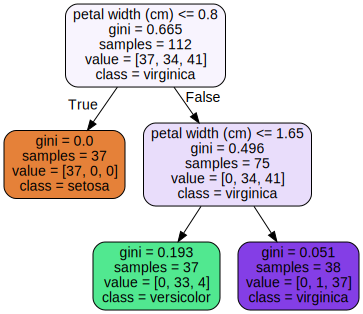

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import numpy as np
import pydot
import pydotplus
import os


iris = load_iris()
iris.keys()

X = iris.data #특징행열(데이터)과 대상 벡터(레이블) 만들기
y = iris.target

np.unique(iris.target, return_counts = True)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
tree = DecisionTreeClassifier(max_depth = 2, random_state = 1) # 고정을 시켜야 첫 변수를 변화시키지 않는다.
tree.fit(X_train,y_train)

export_graphviz(tree, out_file="iris.dot",
                           feature_names=iris.feature_names,
                           class_names=iris.target_names, #분류
                           rounded=True, 
                           filled =True, #색상
                           impurity= True) #gini계수


import graphviz

with open("iris.dot") as f:
    dot_graph =f.read()
    
graphviz.Source(dot_graph)

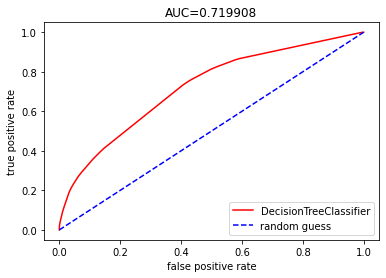

In [12]:
#train data 만들기
import pandas as pd
train_df = pd.read_csv('train.csv', nrows=100000)
unused_columns, label_column = ['id', 'hour', 'device_id', 'device_ip'], 'click'
train_df = train_df.drop(unused_columns, axis=1)
train_df
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
y_train = train_df[label_column]
test_df = pd.read_csv('train.csv', header=0,skiprows=(1,100000), nrows=100000)
test_df = test_df.drop(unused_columns, axis=1)
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())
y_test = test_df[label_column]

#원 핫 인코딩 벡터 변환
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=True)
X_train = vectorizer.fit_transform(X_dict_train)
X_train.shape
X_train.toarray()[:5]
X_test = vectorizer.fit_transform(X_dict_test)

# 그리드서치를 이용한 의사결정 트리 모델 학습
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[3,10,None]}
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(decision_tree, parameters, n_jobs = -1, cv = 3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
grid_search.best_params_
decision_tree_best = grid_search.best_estimator_

# decision tree model의 성능 측정: 정확도, 혼동행렬, ROC의 AUC
y_pred = decision_tree_best.predict(X_test)
y_pred
import numpy as np
np.unique(y_pred, return_counts=True)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #정확도
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #혼동행렬

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]
y_pred_proba
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) #ROC 커브 계산
auc = roc_auc_score(y_test, y_pred_proba) #ROC커브의 auc 계산

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'r-', label = 'DecisionTreeClassifier')
plt.plot([0,1],[0,1], 'b--', label='random guess')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC={0:2f}'.format(auc))
plt.legend(loc='lower right');